<a href="https://colab.research.google.com/github/rakeshvitta/rakeshvitta/blob/main/Group250_Anamoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
<b>Team:</b>

NAVIN APPUKUTTAN NAIR - 2021fc04720

N VISWANATHAN - 2021fc04318

RAKESH VITTA - 2021fc04673

**Dataset:** Anamoly Detection

Location of the Dataset: https://drive.google.com/file/d/1n3hnxH9FPlGJVrbJgXr0fcLpNOvVDJQ-/view?usp=sharing 
</h1>

<h2>Importing Libraries</h2>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

<h2>Import Dataset into the Notebook</h2>

In [3]:
url = 'https://raw.githubusercontent.com/rakeshvitta/rakeshvitta/main/Anamoly.csv'
df = pd.read_csv(url)

<h1>Data Visualization and Exploration</h1>



1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them. ✅
2. Comment on class imbalance with appropriate visualization method. ✅
3. Provide appropriate visualizations to get an insight about the dataset. ✅
4. Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have an effect on feature selection that you will perform in the next step? Justify your answer. Answers without 
justification will not be awarded marks. ❌
5. Any other visualization specific to the problem statement. ❌




<h2>1. Print 2 rows for sanity check</h2>

In [4]:
df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


<h1>Rakesh, why are we doing the below two cells?</h1>

In [5]:
df.iloc[:2,:20]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.iloc[:2,21:]

,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255.0,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255.0,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


In [7]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

<h2>2. Comment on class imbalance with appropriate visualization method.</h2>

In [8]:
#Check the data type of the class and printing the values it takes and counts for each value
df['class'].dtypes
df['class'].value_counts()

anomaly    12833
normal      9711
Name: class, dtype: int64

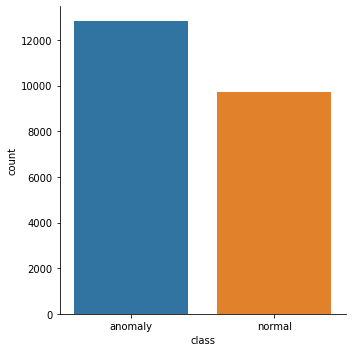

In [9]:
#Looking at the values the dataset is not imbalanced. Visualize the balance:
plot = sns.catplot(x="class", kind="count",  data=df)

From the plot we can see there is no significant imbalance between the classes in the given data set.





<h2>3. Provide appropriate visualizations to get an insight about the dataset.</h2>




> Visualizing different features/columns to see the values and distribution



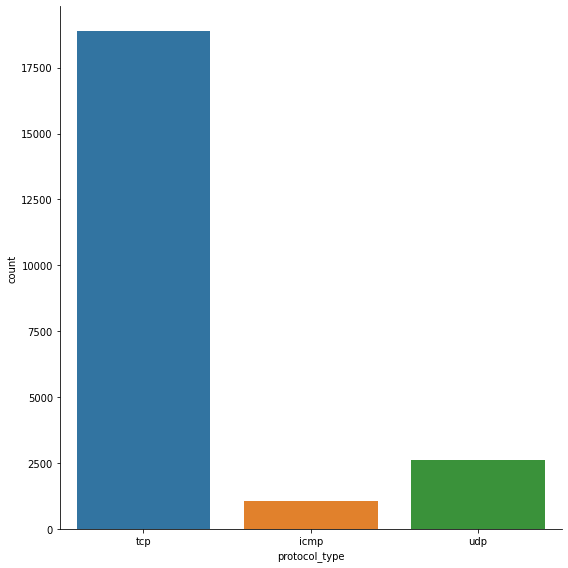

In [10]:
#Checking value counts of feature protocol_type
sns.catplot(x="protocol_type", kind="count",height=8, aspect=1,  data=df);

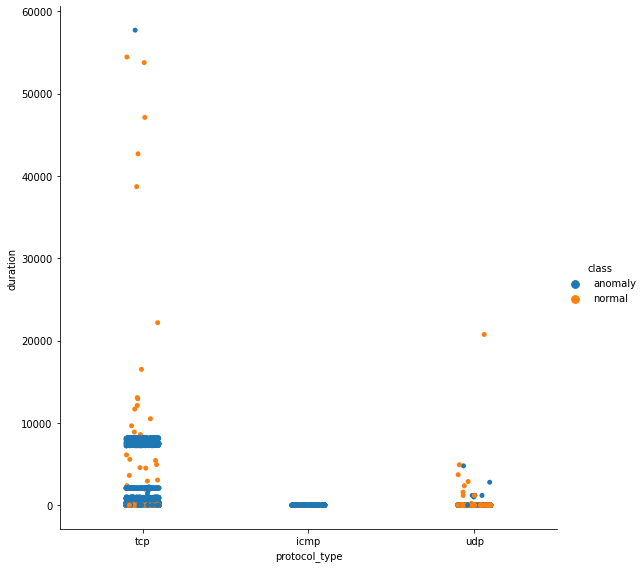

In [11]:
#
sns.catplot(x="protocol_type", y = "duration" ,hue="class",height=8, aspect=1,  data=df);


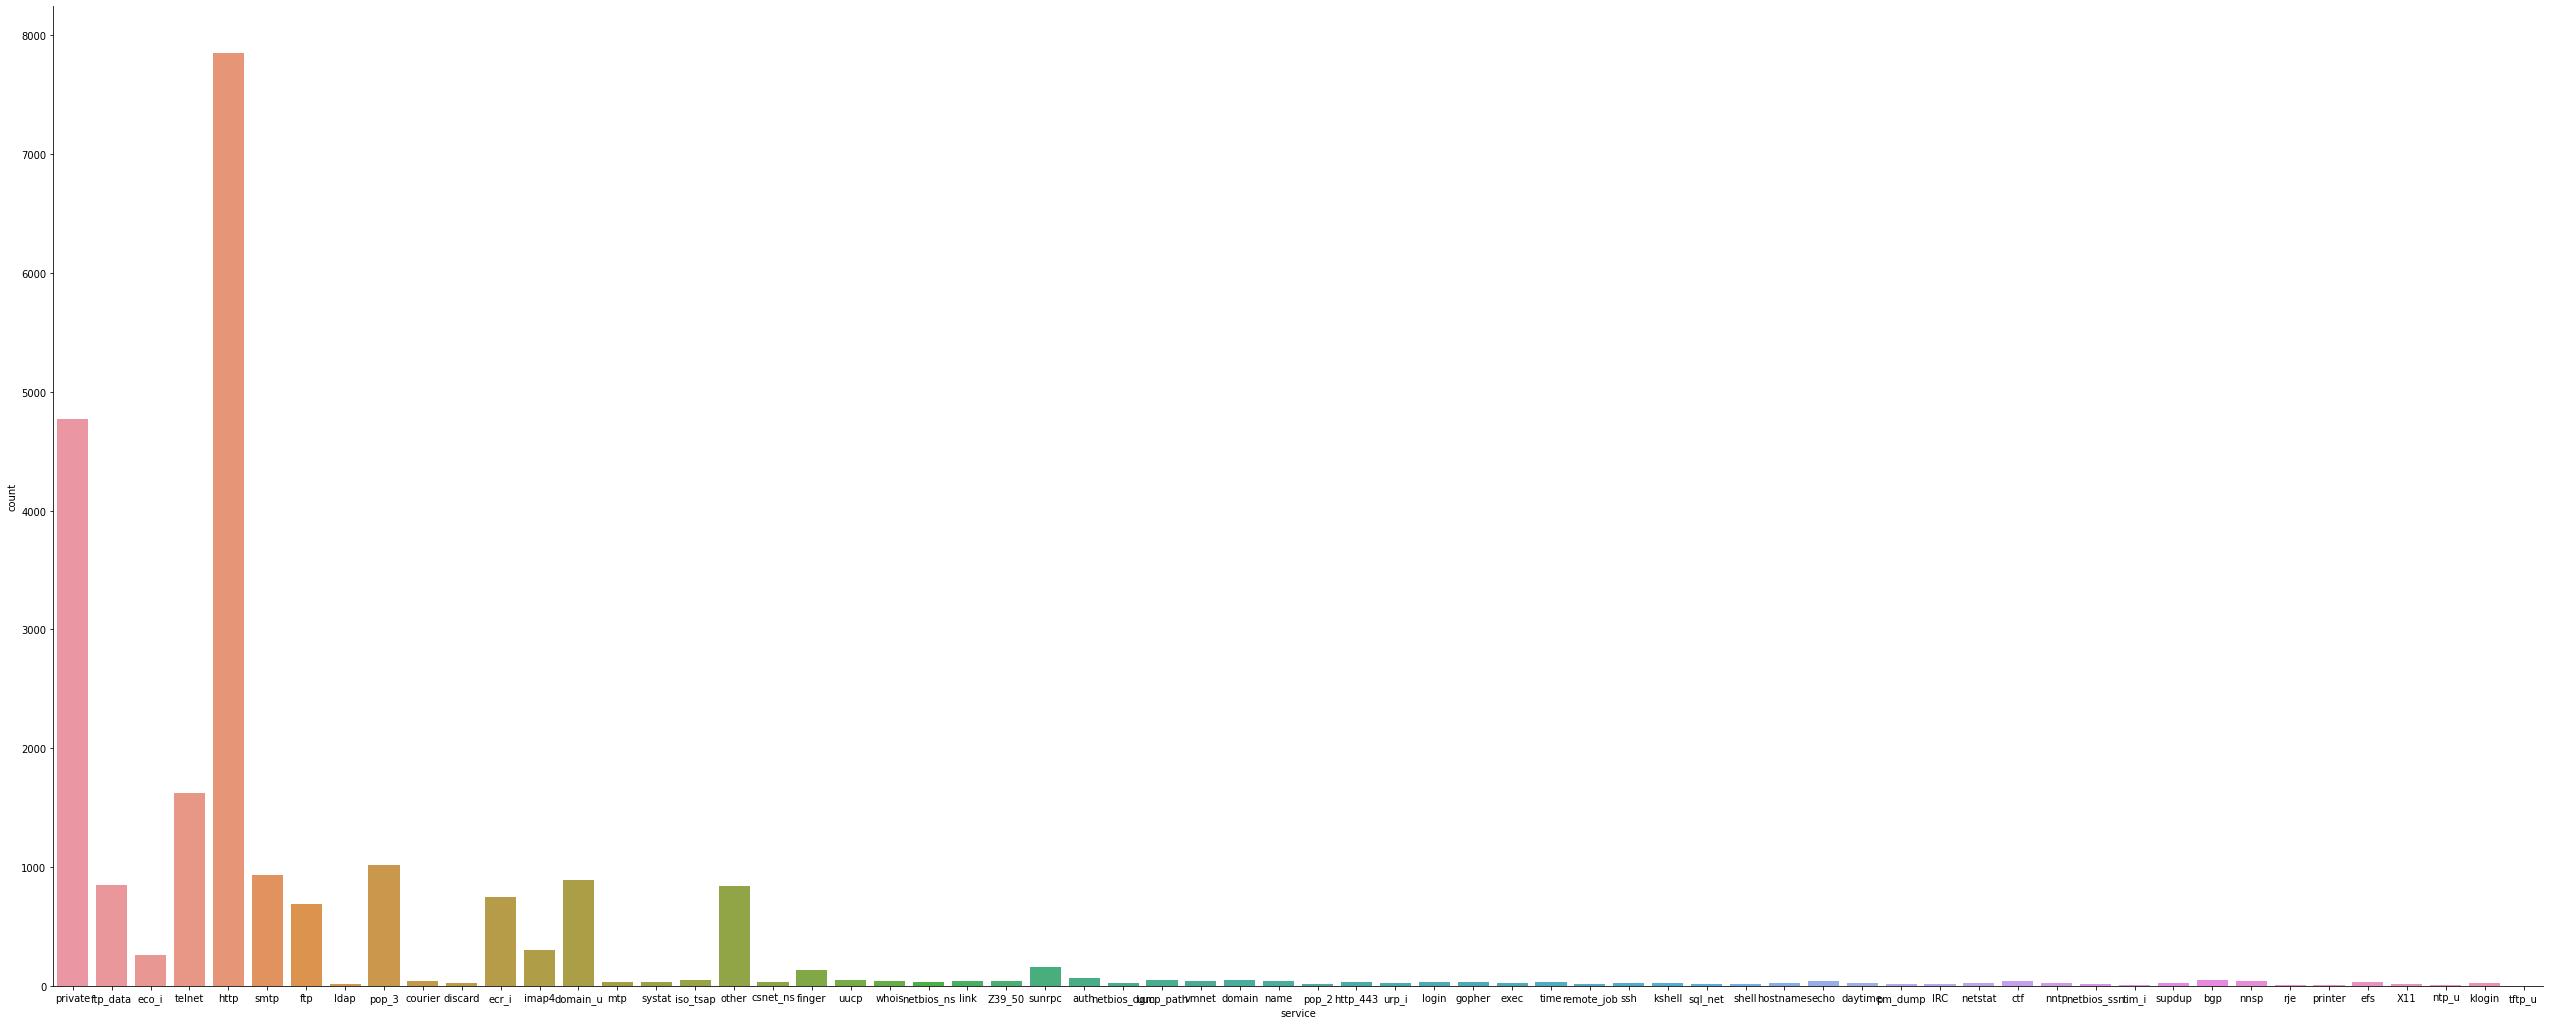

In [12]:
plot = sns.catplot(x="service", kind="count",height=8, aspect=1,  data=df);
plot.fig.set_size_inches(40,15)

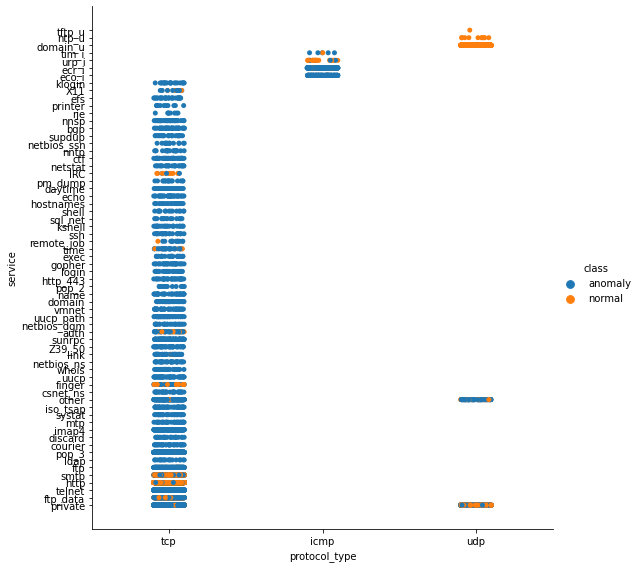

In [13]:
sns.catplot(x="protocol_type", y = "service" ,hue="class",height=8, aspect=1,  data=df);


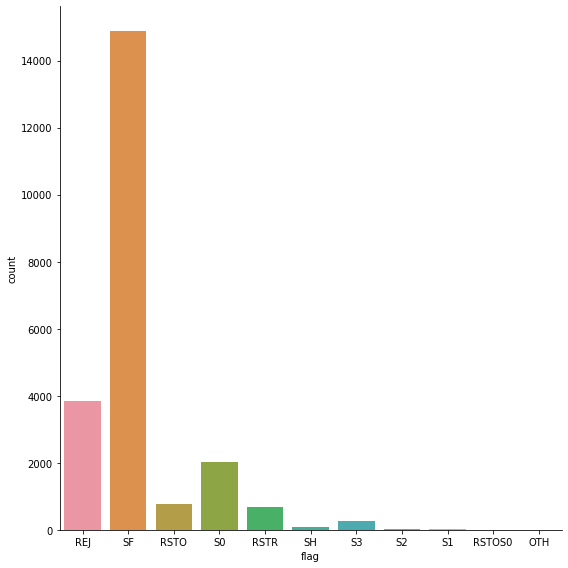

In [14]:
sns.catplot(x="flag", kind="count",height=8, aspect=1,  data=df);

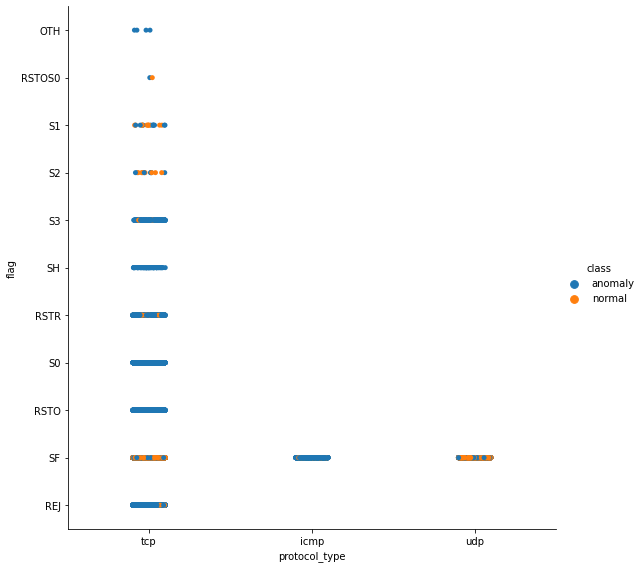

In [15]:
sns.catplot(x="protocol_type", y = "flag" , hue="class",height=8, aspect=1,  data=df);


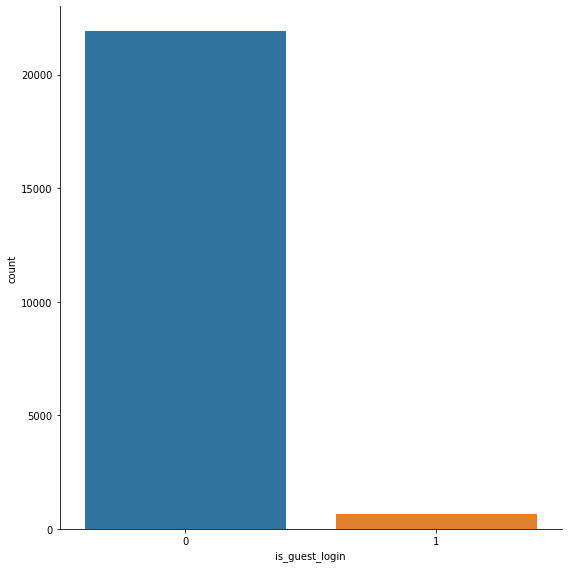

In [16]:
sns.catplot(x="is_guest_login", kind="count",height=8, aspect=1,  data=df);


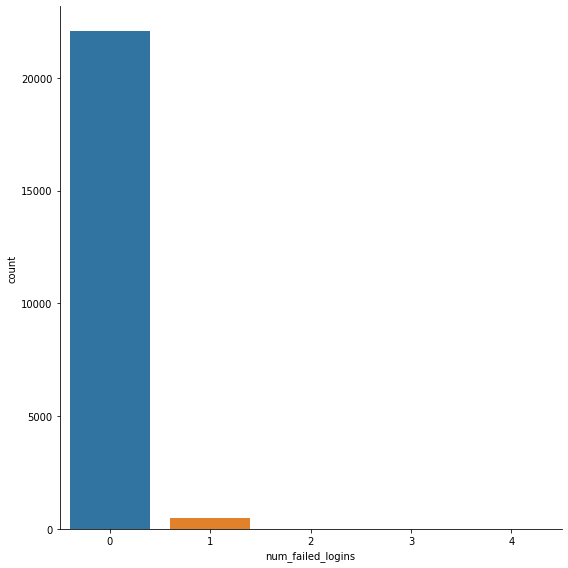

In [17]:
sns.catplot(x="num_failed_logins", kind="count",height=8, aspect=1,  data=df);


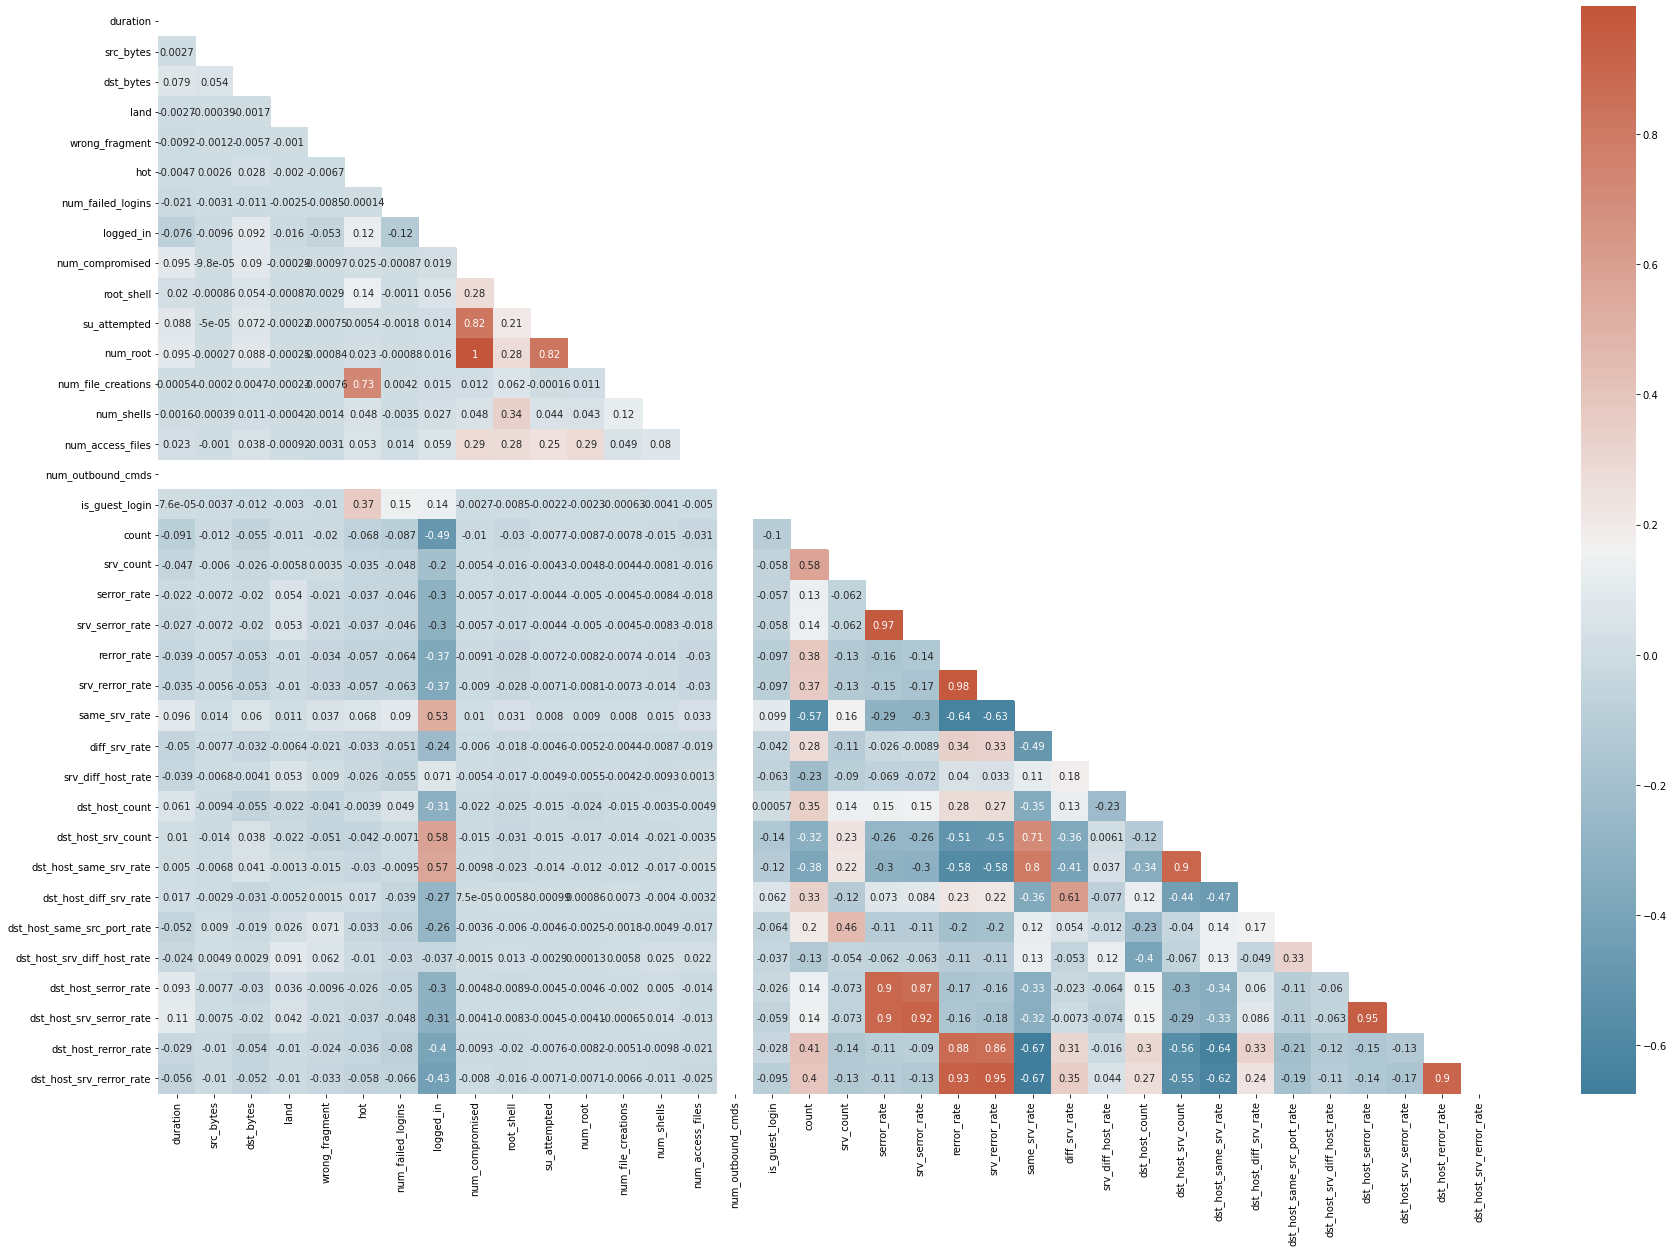

In [18]:
#Correlation Analysis
cor = df.corr()
f, ax = plt.subplots(figsize=(30, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, mask=mask, cmap=cmap)

<h1> Data Preprocessing and Cleaning </h1>


1.  Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters.  ❌
2.   Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks.  Explore a few techniques for identifying feature importance for your feature engineering task. ❌






Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters. 

In [19]:
#Identifying and replacing/dropping null or missing values in the data set
#e_df=pd.DataFrame().from_records([{"empty_prec":np.round(len(df[df[col].isna()])/len(df), 4)*100, "col":col} for col in df.columns])
#print(e_df)
df.isnull().sum()

duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
num_outbound_cmds               0
is_guest_login                  0
count                           0
srv_count                       0
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count

In [20]:
#Only the features dst_host_count and dst_host_srv_count have empty cells
df['dst_host_count'].describe()

count    22531.000000
mean       193.863965
std         94.042593
min          0.000000
25%        121.000000
50%        255.000000
75%        255.000000
max        255.000000
Name: dst_host_count, dtype: float64

In [21]:
df['dst_host_srv_count'].describe()

count    22532.000000
mean       140.752663
std        111.786948
min          0.000000
25%         15.000000
50%        168.000000
75%        255.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64

In [22]:
print(df['dst_host_srv_count'].value_counts())

255.0    7525
1.0      1594
254.0     607
253.0     397
2.0       395
         ... 
202.0      10
112.0      10
207.0      10
205.0       7
0.0         1
Name: dst_host_srv_count, Length: 256, dtype: int64


In [23]:
print(df['dst_host_count'].value_counts())

255.0    14629
1.0        365
2.0        236
3.0        200
4.0        182
         ...  
203.0       10
195.0        7
227.0        7
246.0        7
0.0          1
Name: dst_host_count, Length: 256, dtype: int64


In [24]:
mode_dst = df['dst_host_count'].mode()[0]
mode_dst_host = df['dst_host_srv_count'].mode()[0]
n_df = df.copy(deep=True)
n_df['dst_host_count'].fillna(mode_dst, inplace = True)
n_df['dst_host_srv_count'].fillna(mode_dst_host, inplace = True)

In [25]:
n_df['dst_host_count'].describe()

count    22544.000000
mean       193.899219
std         94.026928
min          0.000000
25%        121.000000
50%        255.000000
75%        255.000000
max        255.000000
Name: dst_host_count, dtype: float64

In [26]:
n_df['dst_host_srv_count'].describe()

count    22544.000000
mean       140.813476
std        111.788256
min          0.000000
25%         15.000000
50%        168.000000
75%        255.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64

<i><b>We observe that the mean and std didnt change by much after replacing the missing values by the mode.</b></i>

In [27]:
#Removing rows with outlier data using the zscore mechanism 

n_df['zscore'] = ( n_df.duration - n_df.duration.mean() ) / n_df.duration.std()
#print(n_df[n_df['zscore']>3])
df_n1 = n_df[(n_df.zscore>-3) & (n_df.zscore<3)]
print("Shape of the dataset after removing the outlier rows",df_n1.shape)

Shape of the dataset after removing the outlier rows (22050, 41)


In [28]:
#Feature - src_bytes
df_n1['zscore'] = ( df_n1.src_bytes - df_n1.src_bytes.mean() ) / df_n1.src_bytes.std()
df_n2 = df_n1.loc[(df_n1.zscore>-3) & (df_n1.zscore<3)]
#Feature - dst_bytes
df_n2['zscore'] = ( df_n2.dst_bytes - df_n2.dst_bytes.mean() ) / df_n2.dst_bytes.std()
df_new = n_df.loc[(n_df.zscore>-3) & (n_df.zscore<3)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
#Removing the zscore column before we run the model on the dataset
new_df = df_new.loc[:, df_new.columns != "zscore"]
print(new_df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


In [30]:
#Removing columns that have high correlation from the dataset.
upper = cor.where(np.triu(np.ones(cor.shape),k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df2 = new_df.drop(columns= to_drop, axis=1)
df2.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [31]:
#Normalization of the numerical features
#Columns duration, src_bytes and dst_bytes have very large range. We can normalize them into [0,1] range 
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_dur = scaler.fit_transform(df2[['duration']])
df2['duration']=scaled_dur
scaled_src = scaler.fit_transform(df2[['src_bytes']])
df2['src_bytes']=scaled_src
scaled_dst = scaler.fit_transform(df2[['dst_bytes']])
df2['dst_bytes']=scaled_dst


#df2 here is the dataset that has the preprocessed and feature engineered data. Use this for the model.

<h1> Model Building </h1>


1.   Split the dataset into training and test sets. Answers without justification will not be awarded marks. ❌

Case 1 :   Train = 80 % Test = 20%  [ x_train1,y_train1] = 80% ; 

   [ x_test1,y_test1] = 20% ; 

Case 2 :   Train = 10 % Test = 90%  [ x_train2,y_train2] = 10% ; 

[ x_test2,y_test2] = 90%  

2.   Explore k-fold cross validation. ❌
3. Model the classifier using GaussianNB, BernoulliNB, and Multinomial NB.  
4. Explore the need of regularization and incorporate few relevant techniques for the problem statement. ❌
5. Compare models with and without regularization in a tabular format and justify the findings. ❌



In [32]:
df2.describe(include = 'all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,22050.000000,22050,22050,22050,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,...,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050
unique,NaN,3,64,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anomaly
freq,NaN,18389,7853,14418,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12362
mean,0.010508,NaN,NaN,NaN,0.000169,0.001490,0.000317,0.008617,0.107755,0.022132,...,140.594512,0.608866,0.089693,0.135095,0.020060,0.092502,0.093091,0.235346,0.230556,NaN
std,0.056931,NaN,NaN,NaN,0.007609,0.014557,0.017815,0.144182,0.938635,0.151967,...,112.427395,0.438372,0.220680,0.308940,0.086285,0.271973,0.279792,0.390042,0.404125,NaN
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,0.000002,0.000039,0.000000,0.000000,0.000000,0.000000,...,166.000000,0.950000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,0.000005,0.000472,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.380000,0.220000,NaN


In [33]:
X = df2.iloc[:, 0:36]
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.00000,tcp,private,REJ,0.000000e+00,0.000000,0,0,0,0,...,255.0,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0.00000,tcp,private,REJ,0.000000e+00,0.000000,0,0,0,0,...,255.0,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,0.00054,tcp,ftp_data,SF,2.066513e-04,0.000000,0,0,0,0,...,134.0,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0.00000,icmp,eco_i,SF,3.183413e-07,0.000000,0,0,0,0,...,3.0,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,0.00027,tcp,telnet,RSTO,0.000000e+00,0.000011,0,0,0,0,...,29.0,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [34]:
X['protocol_type'] = X['protocol_type'].astype('category')
X['service'] = X['service'].astype('category')
X['flag'] = X['flag'].astype('category')
X.dtypes

duration                        float64
protocol_type                  category
service                        category
flag                           category
src_bytes                       float64
dst_bytes                       float64
land                              int64
wrong_fragment                    int64
hot                               int64
num_failed_logins                 int64
logged_in                         int64
num_compromised                   int64
root_shell                        int64
su_attempted                      int64
num_file_creations                int64
num_shells                        int64
num_access_files                  int64
num_outbound_cmds                 int64
is_guest_login                    int64
count                             int64
srv_count                         int64
serror_rate                     float64
rerror_rate                     float64
same_srv_rate                   float64
diff_srv_rate                   float64


In [35]:
X['protocol_type'] = X['protocol_type'].cat.codes
X['service'] = X['service'].cat.codes
X['flag'] = X['flag'].cat.codes

In [36]:
y = df2.iloc[:, 36:37]
y.dtypes

class    object
dtype: object

In [37]:
y['class'] = y['class'].astype('category')
y.dtypes

class    category
dtype: object

In [38]:
y["class"] = y["class"].cat.codes
y

,class
0,0
1,0
2,1
3,0
4,0
...,...
22539,1
22540,1
22541,0
22542,1


In [39]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.00000,1,45,1,0.000000e+00,0.000000,0,0,0,0,...,255.0,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0.00000,1,45,1,0.000000e+00,0.000000,0,0,0,0,...,255.0,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,0.00054,1,19,9,2.066513e-04,0.000000,0,0,0,0,...,134.0,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0.00000,0,13,9,3.183413e-07,0.000000,0,0,0,0,...,3.0,57.0,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,0.00027,1,55,2,0.000000e+00,0.000011,0,0,0,0,...,29.0,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.00000,1,49,9,1.263815e-05,0.000247,0,0,0,0,...,100.0,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0.00000,1,22,9,5.045710e-06,0.000697,0,0,0,0,...,197.0,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0.00000,1,22,9,8.681168e-04,0.006177,0,0,2,0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0.00000,2,11,9,6.685168e-07,0.000031,0,0,0,0,...,255.0,252.0,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [40]:
from sklearn.preprocessing import normalize

X_normalized = normalize(X, norm='l2', axis=1, copy=True, return_norm=False)
X.shape

(22050, 36)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17640, 36), (4410, 36), (17640, 1), (4410, 1))

In [42]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [43]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.to_numpy().reshape(-1))
print("Naive Bayes score: ",gnb.score(X_test, y_test))

Naive Bayes score:  0.8414965986394558


In [44]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.to_numpy().reshape(-1))
print("Bernoulli Bayes score: ",bnb.score(X_test, y_test))

Bernoulli Bayes score:  0.871655328798186


In [45]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train.to_numpy().reshape(-1))
print("Multinomial Bayes score: ",mnb.score(X_test, y_test))

Multinomial Bayes score:  0.7462585034013606


In [46]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = BernoulliNB()
cv_results = cross_val_score(clf, X, y.to_numpy().reshape(-1), cv=k_fold)
print(cv_results)
print(cv_results.mean())

[0.87755102 0.86938776 0.89160998 0.87800454 0.87165533 0.88480726
 0.87437642 0.86303855 0.87800454 0.87755102]
0.8765986394557823


In [47]:
#K-Fold cross validation scores for GaussianNB classifier
#k_fold_gaussian = KFold(n_splits=10, shuffle=True, random_state=0)
clf_g = GaussianNB()
#cv_g_results = cross_val_score(clf_g, X, y.to_numpy().reshape(-1), cv=k_fold_gaussian)
cv_g_results = cross_val_score(clf_g, X, y.to_numpy().reshape(-1), cv=k_fold)
print(cv_g_results)
print(cv_g_results.mean())

[0.84943311 0.82947846 0.85396825 0.84535147 0.84399093 0.85260771
 0.8430839  0.82585034 0.84535147 0.8399093 ]
0.8429024943310658


In [48]:
#K-Fold cross validation scores for MultinomialNB classifier
kfold_multi = KFold(n_splits=10, shuffle=True, random_state=0)
clf_m = MultinomialNB()
cv_m_results = cross_val_score(clf_m, X, y.to_numpy().reshape(-1), cv=kfold_multi)
print(cv_m_results)
print(cv_m_results.mean())

[0.75056689 0.7324263  0.75011338 0.75238095 0.7446712  0.7478458
 0.75555556 0.74421769 0.74376417 0.73424036]
0.745578231292517


<h1> Performance Evaluation </h1>


1.   Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose best for your model. Justify your answer. Answers without justification will not be awarded marks. ❌ 
2. Comment on underfitting/overfitting/just right model. Justify your comment. 
Answers without justification will not be awarded marks. ❌




In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

In [50]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(conf_mat):
  with plt.style.context(('ggplot', 'seaborn')):
      fig = plt.figure(figsize=(6,6), num=1)
      plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Blues )
      plt.xticks([0,1],[0,1])
      plt.yticks([0,1],[0,1])
      plt.xlabel('Predicted Label')
      plt.ylabel('Actual Label')
      for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                  plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="red")
      plt.grid(None)
      plt.title('Confusion Matrix')
      plt.colorbar();

In [51]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_test)
print(f"Naive Bayes model accuracy = {accuracy_score(y_test, y_pred_test)}")
print(f"Naive Bayes model accuracy train = {accuracy_score(y_train, y_pred_train)}")
print(f"Precision Score = {precision_score(y_test, y_pred_test)}")
print(f"Recall Score = {recall_score(y_test, y_pred_test)}")
print(f"F1 Score = {f1_score(y_test, y_pred_test)}")
#print(classification_report(y_test, y_pred_test))

Naive Bayes model accuracy = 0.8414965986394558
Naive Bayes model accuracy train = 0.8429138321995465
Precision Score = 0.7534637326813366
Recall Score = 0.9516212043232115
F1 Score = 0.8410279736183762


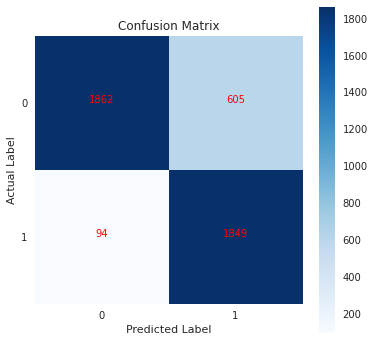

In [52]:
plot_confusion_matrix(conf_mat)

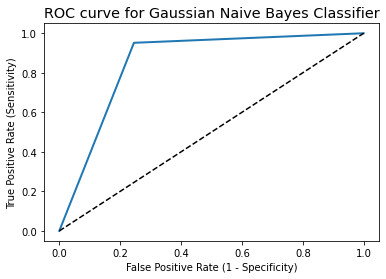

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

The accuracy of train and test data is very similar so it is not over or under-fitted. 

In [54]:
y_pred_train = bnb.predict(X_train)
y_pred_test = bnb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_test)
print(f"Bernoulli model accuracy = {accuracy_score(y_test, y_pred_test)}")
print(f"Bernoulli model accuracy train = {accuracy_score(y_train, y_pred_train)}")
print(f"Precision Score = {precision_score(y_test, y_pred_test)}")
print(f"Recall Score = {recall_score(y_test, y_pred_test)}")
print(f"F1 Score = {f1_score(y_test, y_pred_test)}")
#print(classification_report(y_test, y_pred_test))

Bernoulli model accuracy = 0.871655328798186
Bernoulli model accuracy train = 0.8780045351473923
Precision Score = 0.8097165991902834
Recall Score = 0.9264024704065877
F1 Score = 0.8641382621219396


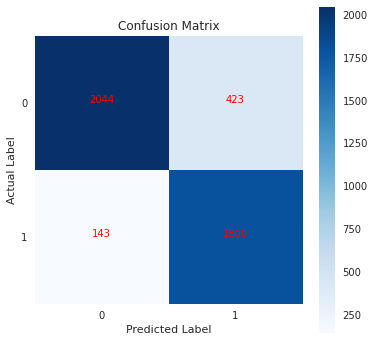

In [55]:
plot_confusion_matrix(conf_mat)

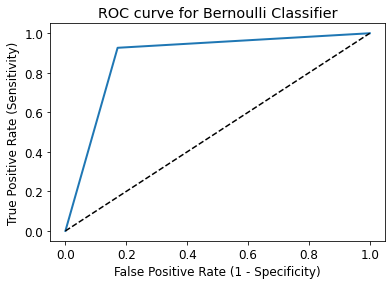

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Bernoulli Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

The accuracy of train and test data is very similar so it is not over or under-fitted.

In [57]:
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_test)
print(f"Multinomial model accuracy = {accuracy_score(y_test, y_pred_test)}")
print(f"Multinomial model accuracy train = {accuracy_score(y_train, y_pred_train)}")
print(f"Precision Score = {precision_score(y_test, y_pred_test)}")
print(f"Recall Score = {recall_score(y_test, y_pred_test)}")
print(f"F1 Score = {f1_score(y_test, y_pred_test)}")
#print(classification_report(y_test, y_pred_test))

Multinomial model accuracy = 0.7462585034013606
Multinomial model accuracy train = 0.7459750566893424
Precision Score = 0.6613155833985904
Recall Score = 0.8692743180648482
F1 Score = 0.7511674449633089


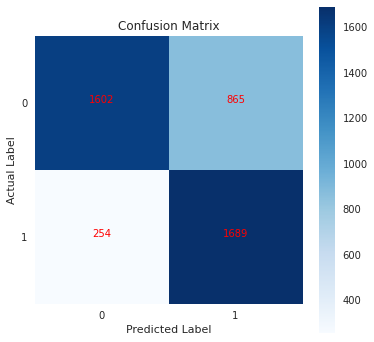

In [58]:
plot_confusion_matrix(conf_mat)

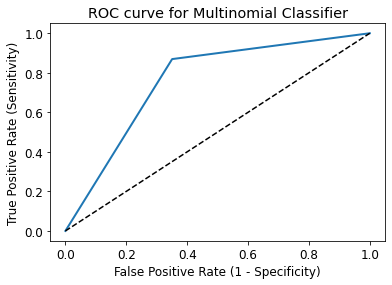

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Multinomial Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

The accuracy of train and test data is very similar so it is not over or under-fitted.